In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from matplotlib import font_manager, rc

In [3]:
font_path = "C:\\USERS\\USER\\APPDATA\\LOCAL\\MICROSOFT\\WINDOWS\\FONTS\\NANUMGOTHICCODING.ttf"

font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family=font_name)

### 데이터 불러오기 및 전처리

In [4]:
df = pd.read_excel('E:\\Python\\시도별 전출입 인구수.xlsx', engine='openpyxl', header=0)

In [5]:
# 누락 데이터(NaN)를 앞 행의 데이터 값으로 채우기
df = df.fillna(method='ffill')

In [6]:
# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별': '전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace = True)

In [7]:
# 서울에서 충청남도, 경상북도, 강원도, 전라남도로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df = df_seoul.loc[['충청남도', '경상북도', '강원도', '전라남도'], col_years]
df = df.T
df.head()

전입지,충청남도,경상북도,강원도,전라남도
1970,15954,11868,9352,10513
1971,18943,16459,12885,16755
1972,23406,22073,13561,20157
1973,27139,27531,16481,22160
1974,25509,26902,15479,21314


### Areaplot unstacked 버전
---
stacked = False를 활용하여 데이터를 누적하지 않음

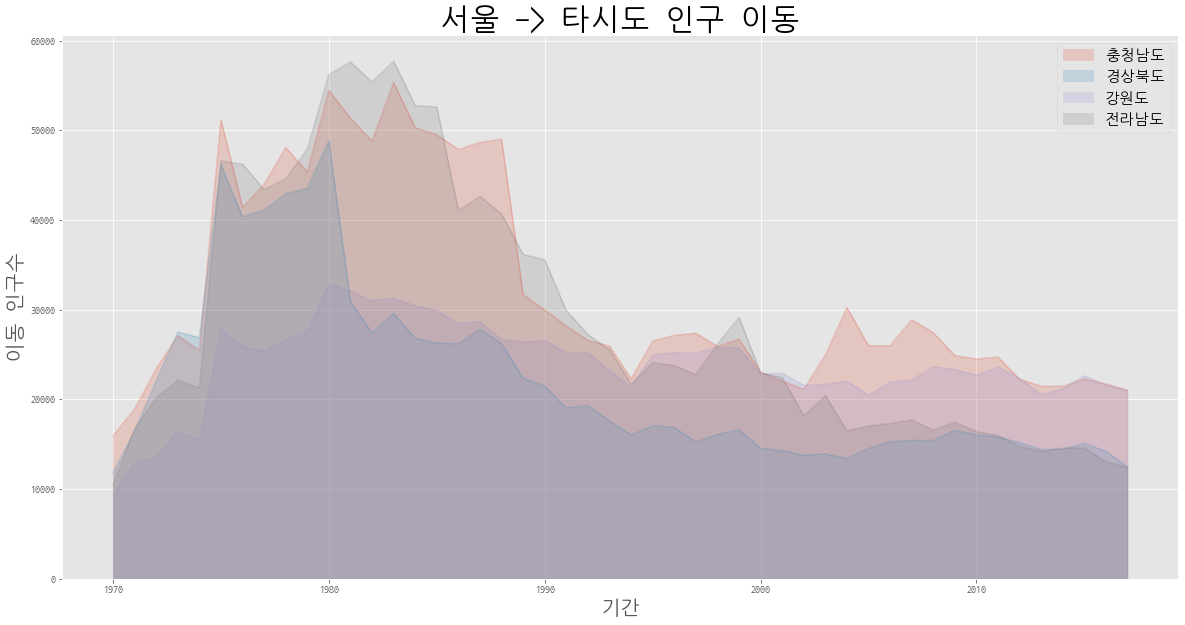

In [8]:
plt.style.use('ggplot')

# 데이터 프레임의 인덱스를 정수형으로 변경(x축 눈금 라벨 표시)
df.index = df.index.map(int)

# 면적 그래프 그리기 alpha는 투명도
df.plot(kind='area', stacked=False, alpha=0.2, figsize=(20, 10))

plt.title("서울 -> 타시도 인구 이동", size = 30)
plt.xlabel('기간', size = 20)                  
plt.ylabel('이동 인구수', size = 20)
plt.legend(loc='best', fontsize=15)

plt.show()

### Areaplot stacked 버전
---
stacked = True를 활용하여 데이터를 누적함

일명 누적 선 그래프(stacked line plot)

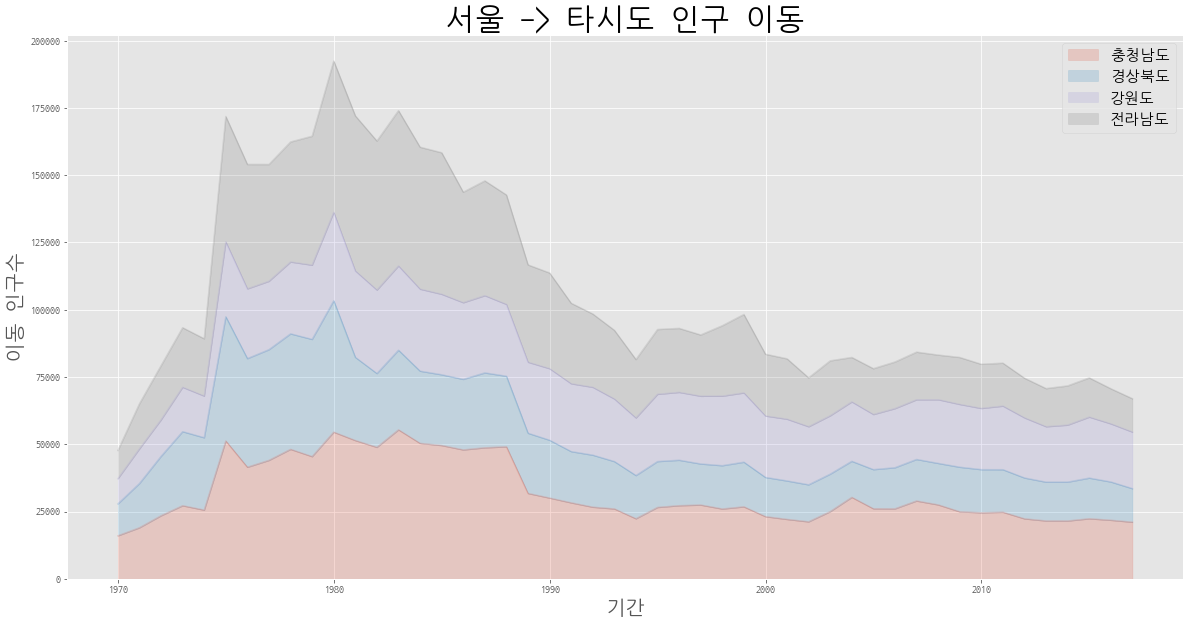

In [9]:
df.index = df.index.map(int)

# 면적 그래프 그리기
df.plot(kind='area', stacked=True, alpha=0.2, figsize=(20, 10))

plt.title("서울 -> 타시도 인구 이동", size = 30)
plt.xlabel('기간', size = 20)                  
plt.ylabel('이동 인구수', size = 20)
plt.legend(loc='best', fontsize=15)

plt.show()

#### axe 객체 활용

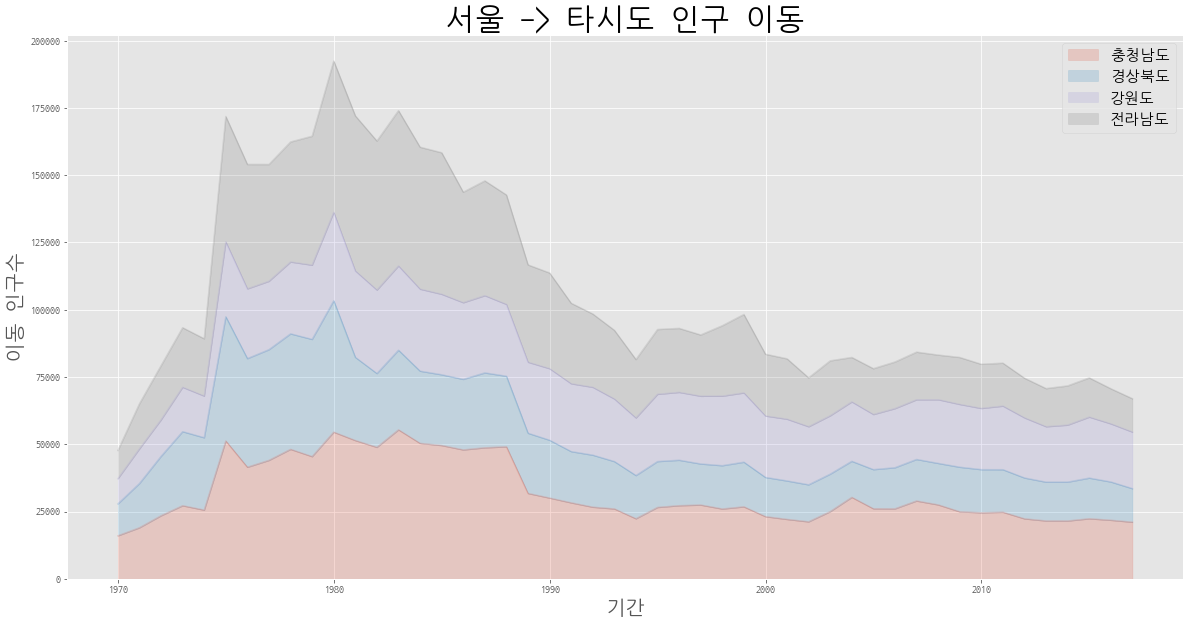

In [10]:
df.index = df.index.map(int)

# 면적 그래프 그리기
df.plot(kind='area', stacked=True, alpha=0.2, figsize=(20, 10))

plt.title("서울 -> 타시도 인구 이동", size = 30)
plt.xlabel('기간', size = 20)                  
plt.ylabel('이동 인구수', size = 20)
plt.legend(loc='best', fontsize=15)

plt.show()

### 화면 분할하여 그래프 여러 개 그리기
---
axe 객체 활용

<class 'matplotlib.axes._subplots.AxesSubplot'>


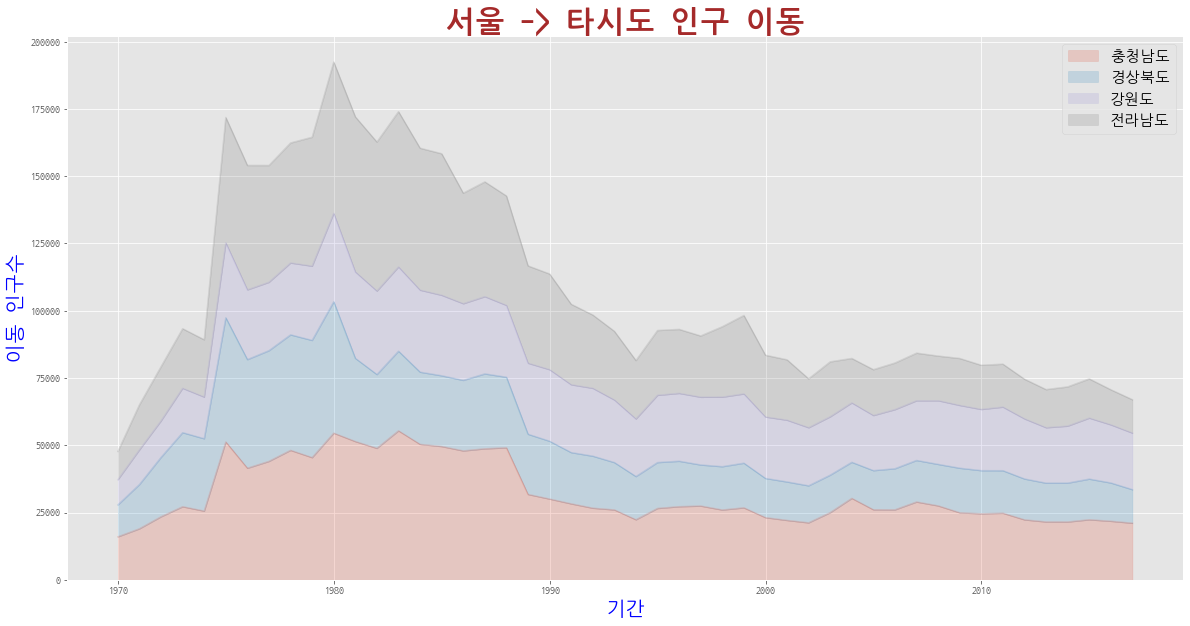

In [11]:
df.index = df.index.map(int)

# 면적 그래프 axe 객체 생성
ax = df.plot(kind='area', stacked=True, alpha=0.2, figsize=(20, 10))
print(type(ax))

# axe 객체 설정 변경
ax.set_title("서울 -> 타시도 인구 이동", size = 30, color='brown', weight='bold')
ax.set_xlabel('기간', size = 20, color='blue')                  
ax.set_ylabel('이동 인구수', size = 20, color='blue')
ax.legend(loc='best', fontsize=15)

plt.show()